(1037, 640)


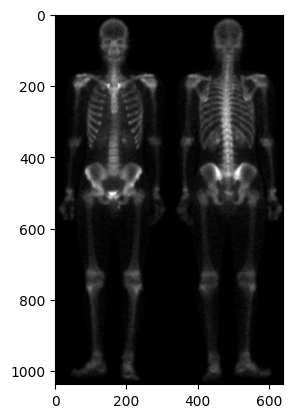

In [65]:
# import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# load image as grayscale
image = cv2.imread("WholeBoneScan.png", cv2.IMREAD_GRAYSCALE)

# convert type
image = image.astype(np.float32)

# print shape to make sure it is graysacale (2 dimensional)
print(image.shape)

# show image
plt.imshow(image, cmap="gray")

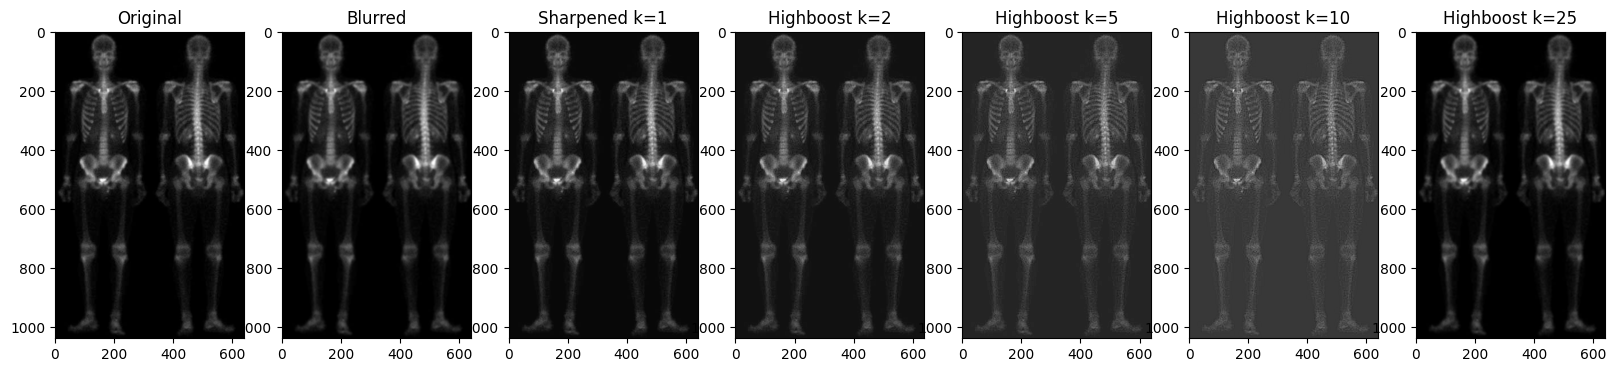

In [66]:
# create 5x5 box filter 
kernel = np.ones((5,5), np.float32)/25

# perform convolution
blurred = cv2.filter2D(image, -1, kernel)

# subtract blurred image from original image
mask = image - blurred

# add mask to original with varying values of k
k = 1
sharpened = image + k*mask

# highboost filter: k = 2
k = 2
highboost = image + k*mask

# highboost filter k = 5
k = 5
highboost2 = image + k*mask

# highboost filter k = 10
k = 10
highboost3 = image + k*mask

# highboost filter k = -1
k = -1
highboost4 = image + k*mask

# show images in a 1 x 6 grid
fig, ax = plt.subplots(1, 7, figsize=(20, 20))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(blurred, cmap="gray")
ax[1].set_title("Blurred")
ax[2].imshow(sharpened, cmap="gray")
ax[2].set_title("Sharpened k=1")
ax[3].imshow(highboost, cmap="gray")
ax[3].set_title("Highboost k=2")
ax[4].imshow(highboost2, cmap="gray")
ax[4].set_title("Highboost k=5")
ax[5].imshow(highboost3, cmap="gray")
ax[5].set_title("Highboost k=10")
ax[6].imshow(highboost4, cmap="gray")
ax[6].set_title("Highboost k=25")

# show plots
plt.show()

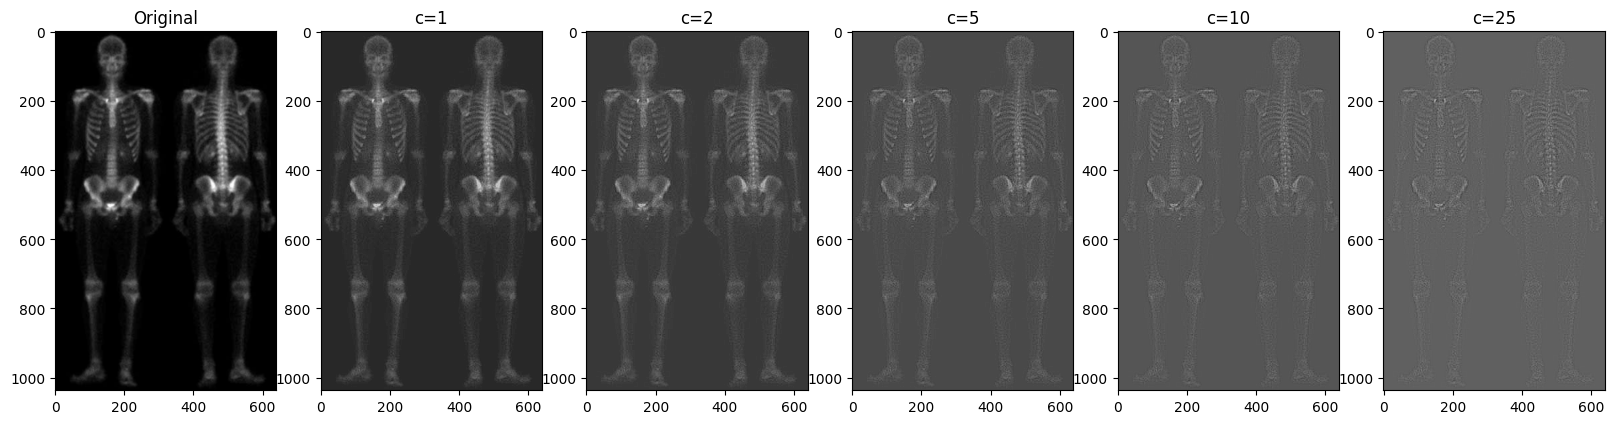

In [67]:
# define laplacian kernel
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# filter image with laplacian kernel
laplacian = cv2.filter2D(image, -1, kernel)

# second order derivative c = 1
c = 1
newImage = image + c * laplacian

# second order derivative c = 2
c = 2
newImage2 = image + c * laplacian

# second order derivative c = 5
c = 5
newImage3 = image + c * laplacian

# second order derivative c = 10
c = 10
newImage4 = image + c * laplacian

# second order derivative c = 25
c = 25
newImage5 = image + c * laplacian

# show images in a 1 x 6 grid
fig, ax = plt.subplots(1, 6, figsize=(20, 20))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(newImage, cmap="gray")
ax[1].set_title("c=1")
ax[2].imshow(newImage2, cmap="gray")
ax[2].set_title("c=2")
ax[3].imshow(newImage3, cmap="gray")
ax[3].set_title("c=5")
ax[4].imshow(newImage4, cmap="gray")
ax[4].set_title("c=10")
ax[5].imshow(newImage5, cmap="gray")
ax[5].set_title("c=25")

# show plots
plt.show()


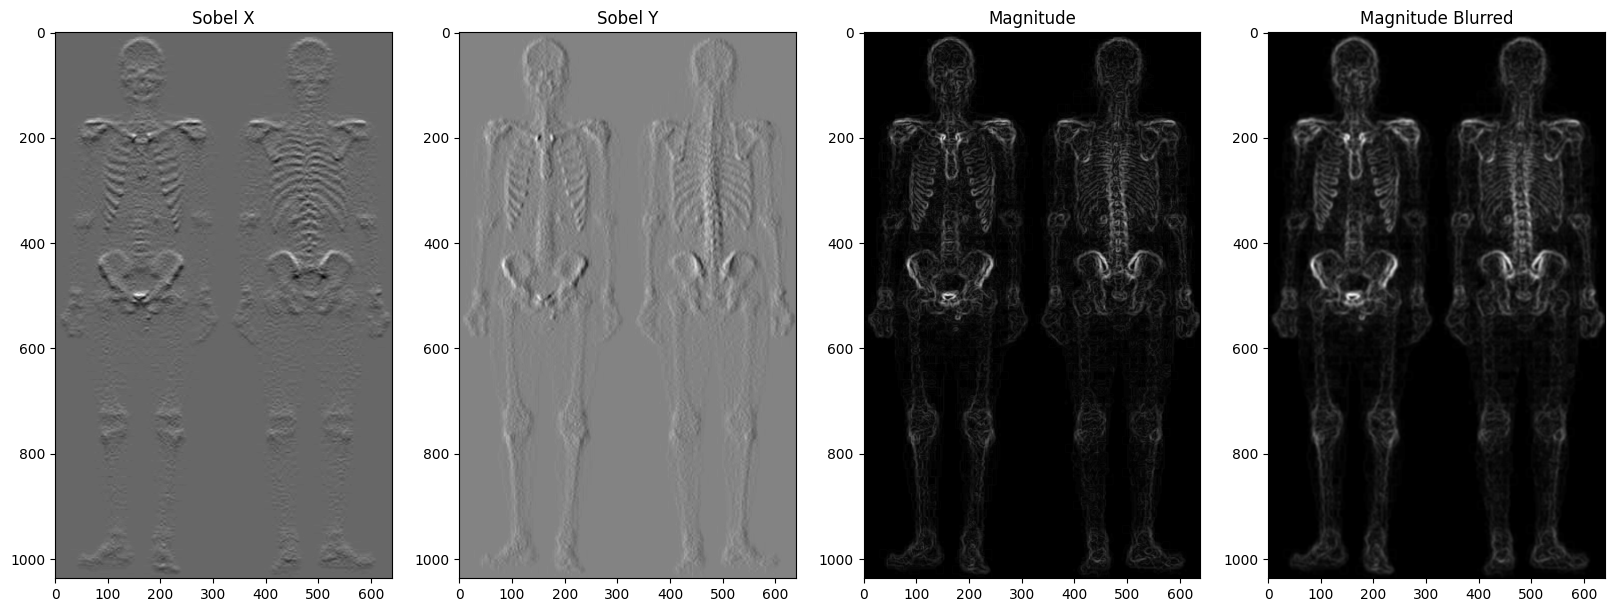

In [68]:
# define sobel filter
kernelX = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
kernelY = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# first order derivatives
sobelX = cv2.filter2D(image, -1, kernelX)
sobelY = cv2.filter2D(image, -1, kernelY)

# calculate gradient magnitude
magnitude = np.sqrt(np.square(sobelX) + np.square(sobelY))
magnitude = magnitude.astype(np.uint8)

# create 5x5 box filter
kernel = np.ones((5,5), np.float32)/25

# blur magnitude with box filter
blurred = cv2.filter2D(magnitude, -1, kernel)

# normalize blurred image within range [0, 1]
blurredNormalized = (blurred - np.min(blurred)) / (np.max(blurred) - np.min(blurred))

# show first order derivatives, magnitude, and blurred
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
ax[0].imshow(sobelX, cmap="gray")
ax[0].set_title("Sobel X")
ax[1].imshow(sobelY, cmap="gray")
ax[1].set_title("Sobel Y")
ax[2].imshow(magnitude, cmap="gray")
ax[2].set_title("Magnitude")
ax[3].imshow(blurred, cmap="gray")
ax[3].set_title("Magnitude Blurred")

# show plots
plt.show()

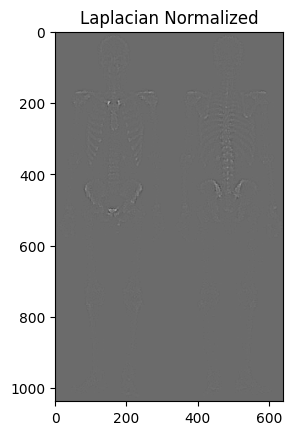

In [69]:
# elementwise multiplication of blurredNormalized and laplacian
laplacianNormalized = laplacian * blurredNormalized

# show laplacianNormalized
plt.imshow(laplacianNormalized, cmap="gray")
plt.title("Laplacian Normalized")
plt.show()

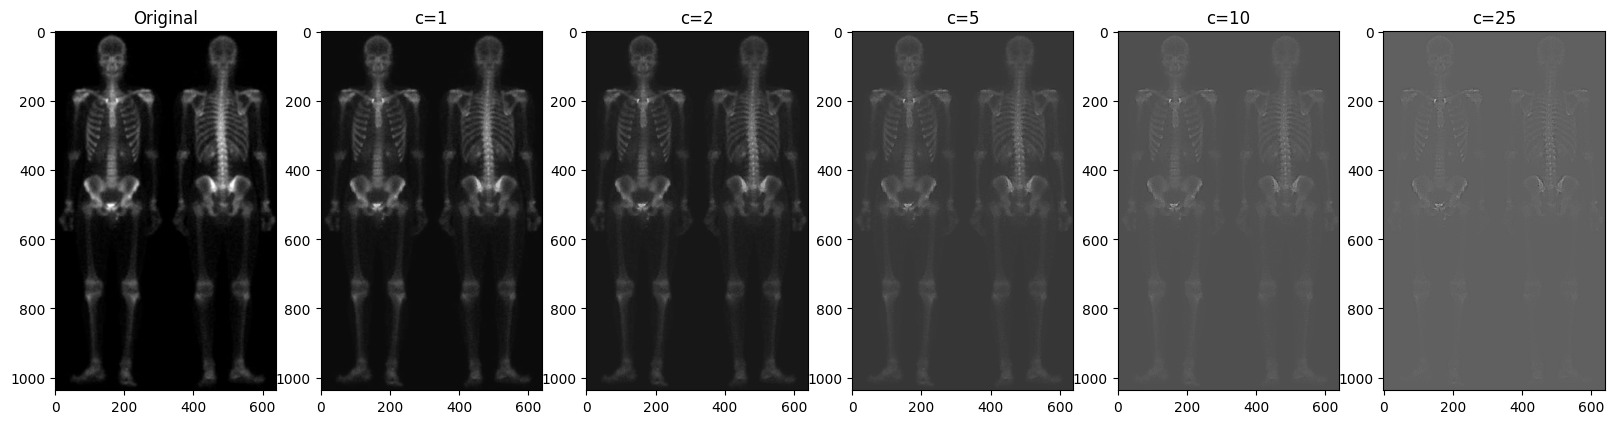

In [70]:
# add laplacianNormalized to original image

# c = 1
c = 1
newImage = image + c * laplacianNormalized 

# c = 2
c = 2
newImage2 = image + c * laplacianNormalized

# c = 5
c = 5
newImage3 = image + c * laplacianNormalized

# c = 10
c = 10
newImage4 = image + c * laplacianNormalized

# c = 25
c = 25
newImage5 = image + c * laplacianNormalized

# show images in a 1 x 6 grid
fig, ax = plt.subplots(1, 6, figsize=(20, 20))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(newImage, cmap="gray")
ax[1].set_title("c=1")
ax[2].imshow(newImage2, cmap="gray")
ax[2].set_title("c=2")
ax[3].imshow(newImage3, cmap="gray")
ax[3].set_title("c=5")
ax[4].imshow(newImage4, cmap="gray")
ax[4].set_title("c=10")
ax[5].imshow(newImage5, cmap="gray")
ax[5].set_title("c=25")

# show plots
plt.show()

C:\Users\sungm\AppData\Local\Temp\ipykernel_20868\996314628.py:7: RuntimeWarning: invalid value encountered in power
  gammaTransform2 = np.power(newImage2.astype(np.float32), gamma)
C:\Users\sungm\AppData\Local\Temp\ipykernel_20868\996314628.py:10: RuntimeWarning: invalid value encountered in power
  gammaTransform3 = np.power(newImage3.astype(np.float32), gamma)
C:\Users\sungm\AppData\Local\Temp\ipykernel_20868\996314628.py:13: RuntimeWarning: invalid value encountered in power
  gammaTransform4 = np.power(newImage4.astype(np.float32), gamma)
C:\Users\sungm\AppData\Local\Temp\ipykernel_20868\996314628.py:16: RuntimeWarning: invalid value encountered in power
  gammaTransform5 = np.power(newImage5.astype(np.float32), gamma)


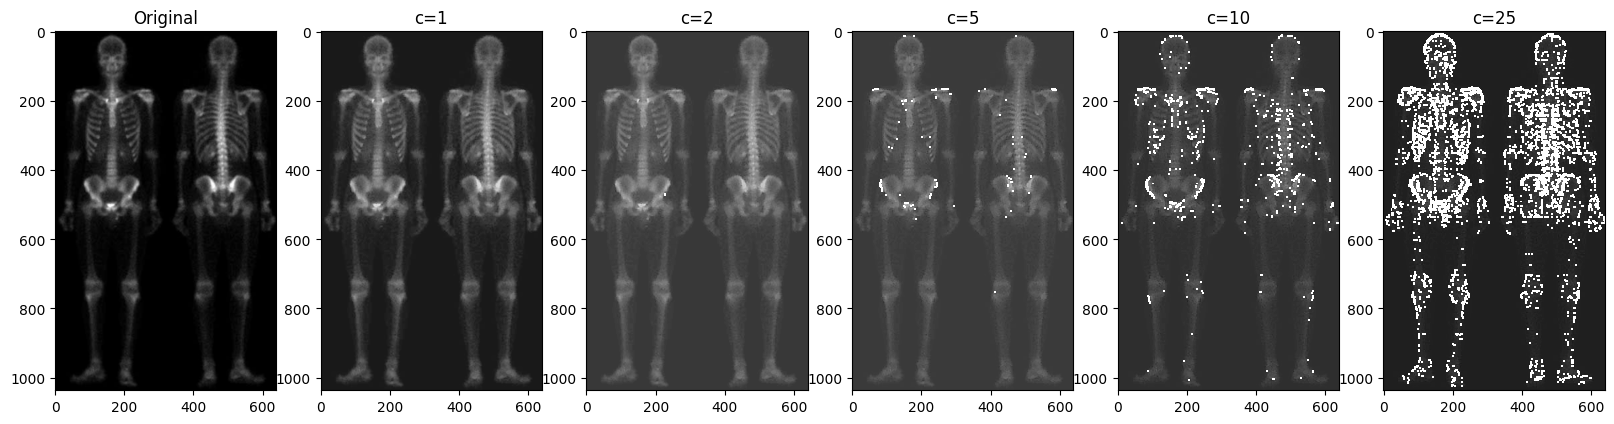

In [71]:
# apply power law transformation where gamma = 0.5
gamma = 0.5
c = 1
gammaTransform = np.power(newImage.astype(np.float32), gamma)

c = 2
gammaTransform2 = np.power(newImage2.astype(np.float32), gamma)

c = 5
gammaTransform3 = np.power(newImage3.astype(np.float32), gamma)

c = 10
gammaTransform4 = np.power(newImage4.astype(np.float32), gamma)

c = 25
gammaTransform5 = np.power(newImage5.astype(np.float32), gamma)

# show images in a 1 x 6 grid
fig, ax = plt.subplots(1, 6, figsize=(20, 20))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(gammaTransform, cmap="gray")
ax[1].set_title("c=1")
ax[2].imshow(gammaTransform2, cmap="gray")
ax[2].set_title("c=2")
ax[3].imshow(gammaTransform3, cmap="gray")
ax[3].set_title("c=5")
ax[4].imshow(gammaTransform4, cmap="gray")
ax[4].set_title("c=10")
ax[5].imshow(gammaTransform5, cmap="gray")
ax[5].set_title("c=25")

# show plots
plt.show()